In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\Munir\Downloads\Ai_Project-master\smart_mart_inventory.csv'
df = pd.read_csv(file_path)  # define df once


In [5]:
# Identify items below or close to stock threshold
df['StockAlert'] = df.apply(
    lambda row: 'Reorder Needed' if row['Quantity'] <= row['StockThreshold'] else 'Sufficient', axis=1
)

# Display alerts
stock_alerts = df[['ItemName', 'Quantity', 'StockThreshold', 'StockAlert']]
print(stock_alerts[stock_alerts['StockAlert'] == 'Reorder Needed'])

                ItemName  Quantity  StockThreshold      StockAlert
1       Hope Frozen Meat        14              50  Reorder Needed
5            Fly Allergy         6              23  Reorder Needed
7          Physical Salt        26              42  Reorder Needed
16     Forget Frozen Veg        17              45  Reorder Needed
22      White Vegetables        22              34  Reorder Needed
...                  ...       ...             ...             ...
99955         Cold Water        10              34  Reorder Needed
99971     East Ice Cream        32              38  Reorder Needed
99975    Anyone Diabetes        20              50  Reorder Needed
99998         World Buns        14              23  Reorder Needed
99999        Claim Water        16              48  Reorder Needed

[17948 rows x 4 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Quantity', 'StockThreshold']]  
y = df['Quantity']  # Dependent variable (target is Quantity, or you can use other metrics)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future demand based on the model
df['PredictedDemand'] = model.predict(X)
print(df[['ItemName', 'Quantity', 'StockThreshold', 'PredictedDemand']])


                    ItemName  Quantity  StockThreshold  PredictedDemand
0               Prepare Rice        88              26             88.0
1           Hope Frozen Meat        14              50             14.0
2          Decade Vegetables        68              32             68.0
3                 Agree Rice        38              15             38.0
4                 Song Water        60              15             60.0
...                      ...       ...             ...              ...
99995         Program Pastry        74              48             74.0
99996             Might Buns       114              50            114.0
99997  Successful Antibiotic        88              16             88.0
99998             World Buns        14              23             14.0
99999            Claim Water        16              48             16.0

[100000 rows x 4 columns]


In [10]:
df['StockAlert'] = df.apply(
    lambda row: 'Reorder Needed' if row['PredictedDemand'] > row['StockThreshold'] else 'Sufficient', axis=1
)

# Display stock alerts
stock_alerts = df[['ItemName', 'Quantity', 'StockThreshold', 'PredictedDemand', 'StockAlert']]
print(stock_alerts[stock_alerts['StockAlert'] == 'Reorder Needed'])


                    ItemName  Quantity  StockThreshold  PredictedDemand  \
0               Prepare Rice        88              26             88.0   
2          Decade Vegetables        68              32             68.0   
3                 Agree Rice        38              15             38.0   
4                 Song Water        60              15             60.0   
6       Production Analgesic       137              42            137.0   
...                      ...       ...             ...              ...   
99993        Home Vegetables       102              11            102.0   
99994            Amount Rice        63              14             63.0   
99995         Program Pastry        74              48             74.0   
99996             Might Buns       114              50            114.0   
99997  Successful Antibiotic        88              16             88.0   

           StockAlert  
0      Reorder Needed  
2      Reorder Needed  
3      Reorder Needed  
4  

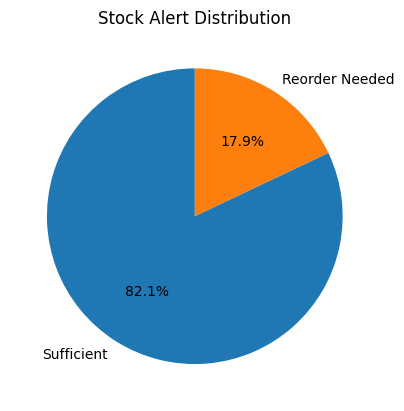

In [14]:
import matplotlib.pyplot as plt

# Count of reorder needed vs. sufficient
alert_counts = df['StockAlert'].value_counts()
alert_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Stock Alert Distribution')
plt.show()
